In [1]:
from load_and_reduce import load_and_reduce
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#load data
intake_path = "Austin_Animal_Center_Intakes.csv"
outcome_path = "Austin_Animal_Center_Outcomes.csv"

X, y = load_and_reduce(intake_path, outcome_path, coding = "label", scale = True, DimRed = "None")

X.head()

Begin Feature Engineering

Starting Cardinality of Breed 2419
Starting Cardinality of Color 562

Cardinality of Breed After Removing Mix and / 246
Cardinality of Color After Removing / 58

Cardinality of Breed After Boiling Down Rare Breeds 105
Cardinality of Color After Boiling Down Rare Colors 41

Total Dimensions of X before Encoding (103049, 12)
Scaling ['Age (Days)']
Final Dimensions of X (103049, 12)


,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,Age (Days),Mix_Breed,Mix_Color,Sex_Changed
0,4,5,1,3,19,39,6,3,1.638629,1,1,0
1,4,5,0,4,43,24,8,4,-0.702351,1,1,0
2,4,5,0,4,43,24,8,4,-0.702351,1,1,0
3,4,5,0,4,43,24,8,4,-0.702351,1,1,0
4,4,3,1,0,73,4,3,0,0.297251,1,1,0


### Aim: Linear Regression with Age(Days) and time_in_shelter_days

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
LinReg = LinearRegression()

#LinReg.fit(X['Age (Days)'], y)


In [3]:
#lin_regplot(X, y, slr)
#plt.scatter(X, y, color='steelblue', edgecolor='white', s=70)
#plt.plot(range(0, 3000), LinReg.predict(range(0, 3000)), color='black', lw=2)

#plt.xlabel(columns[0])
#plt.ylabel(columns[1])

#plt.show()

In [4]:
#import numpy as np
y= np.array(y).reshape(-1, 1)

In [5]:
type(y)

numpy.ndarray

In [6]:
y.shape

(103049, 1)

In [7]:
Age = np.array(X['Age (Days)']).reshape(-1, 1)

In [8]:
Age.shape

(103049, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Age, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
LinReg = LinearRegression()

LinReg.fit(X_train, y_train)


LinearRegression()

In [11]:
LinReg.predict([[3.0]])

array([[27.2957093]])

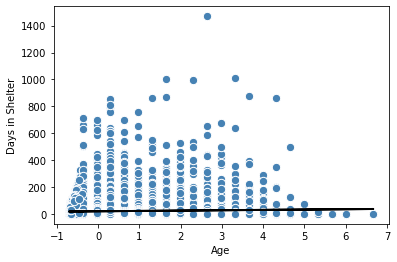

In [12]:
def linear_regression_plot(X, y,model):
    plt.scatter(X, y, c='steelblue', edgecolor = 'white', s=70)
    plt.plot(X,model.predict(X),color='black', lw=2)
    return None

import matplotlib.pyplot as plt

linear_regression_plot(X_test,y_test, LinReg)
plt.xlabel('Age')
plt.ylabel('Days in Shelter')
plt.label('Test Data')
plt.show()

In [19]:
r2_score(y_train, LinReg.predict(X_train)) # train data 

0.0032990897174647316

In [20]:
r2_score(y_test, LinReg.predict(X_test)) # test data

0.002844242234918526

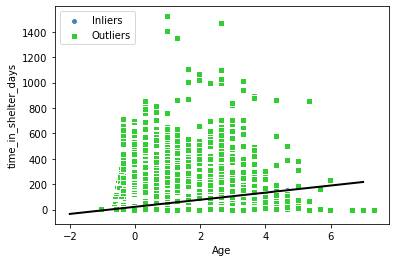

In [29]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=200, 
                         min_samples=100, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(Age, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(np.floor( np.amin(Age) ) , np.ceil(np.amax(Age)), 1)

line_y_ransac = ransac.predict(line_X[:, np.newaxis])



plt.scatter(Age[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')


plt.scatter(Age[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Age')
plt.ylabel('time_in_shelter_days')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()


In [27]:
r2_score(y_train, ransac.predict(X_train)) # train data 

-0.32260611064957057

In [28]:
r2_score(y_test, ransac.predict(X_test)) # train data 

-0.3210547981023575

array([3, 4, 5, 6, 7, 8, 9])